<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("asset_information_data.csv")
df2 = pd.read_csv("asset_price_data.csv")
df3 = pd.read_csv("portfolio_weights.csv")

In [2]:
df1

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [3]:
df2

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [4]:
print(df2.isnull().sum())

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64


In [5]:
df2 = df2.fillna(method='ffill').fillna(method='bfill')

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_4135/3871690291.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df2.fillna(method='ffill').fillna(method='bfill')


In [6]:
print(df3.isnull().sum())

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64


In [7]:
df3

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [8]:
print(df2.dtypes)

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object


In [9]:
print(df3.dtypes)

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object


In [10]:
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')
df3['date'] = pd.to_datetime(df3['date'], errors='coerce')

In [11]:
df2 = df2.set_index('date')
df3 = df3.set_index('date')

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [12]:
normalized_df2 = df2 / df2.iloc[0] * 100

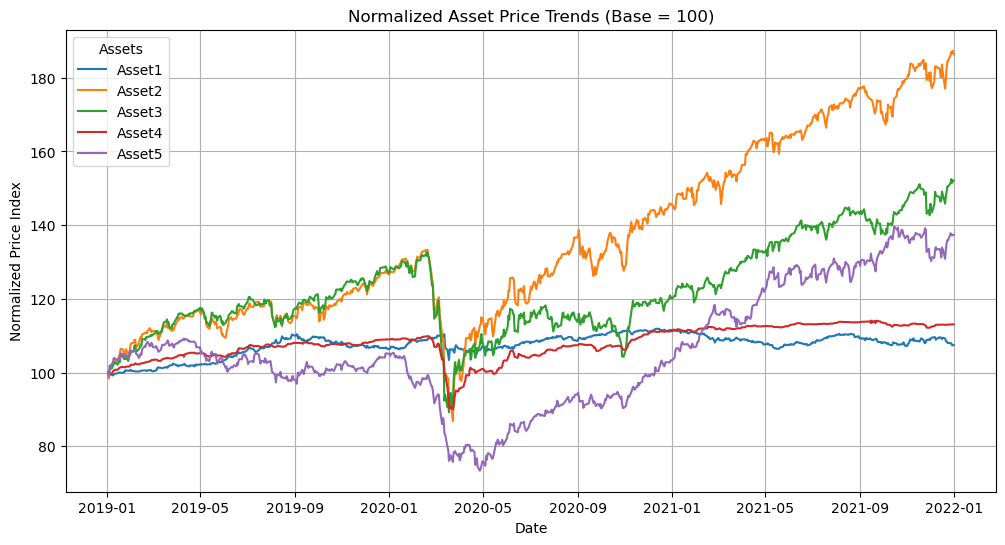

In [13]:
plt.figure(figsize=(12,6))
for col in normalized_df2.columns:
    plt.plot(normalized_df2.index, normalized_df2[col], label=col)
plt.title("Normalized Asset Price Trends (Base = 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price Index")
plt.legend(title="Assets", loc="upper left")
plt.grid(True)
plt.savefig('normalized_asset.png', bbox_inches='tight')
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [14]:
returns = df2.pct_change() * 100
returns = returns.dropna()

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

          Asset1    Asset2    Asset3    Asset4    Asset5
Asset1  1.000000 -0.088341 -0.061253  0.102252 -0.106484
Asset2 -0.088341  1.000000  0.852491  0.526634  0.591399
Asset3 -0.061253  0.852491  1.000000  0.511550  0.557414
Asset4  0.102252  0.526634  0.511550  1.000000  0.421155
Asset5 -0.106484  0.591399  0.557414  0.421155  1.000000


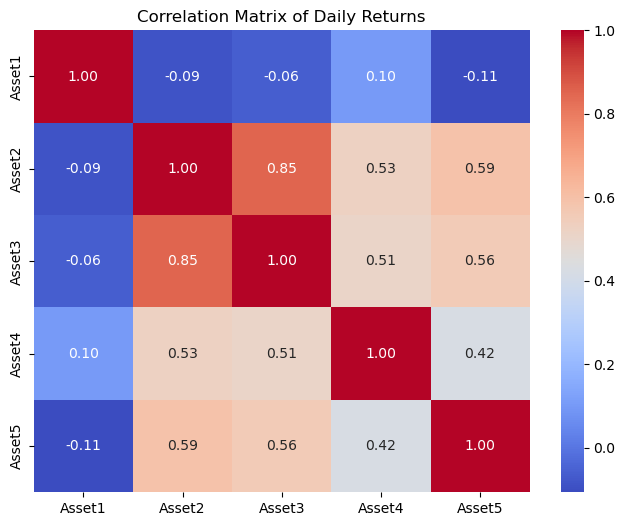

In [30]:
corr_matrix = returns.corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Daily Returns")
plt.savefig('correlation.png', bbox_inches='tight')
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

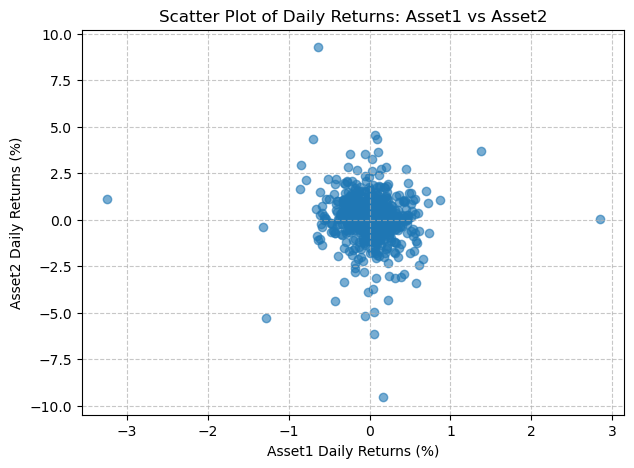

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(returns['Asset1'], returns['Asset2'], alpha=0.6)
plt.title("Scatter Plot of Daily Returns: Asset1 vs Asset2")
plt.xlabel("Asset1 Daily Returns (%)")
plt.ylabel("Asset2 Daily Returns (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('scatter_plot.png', bbox_inches='tight')
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

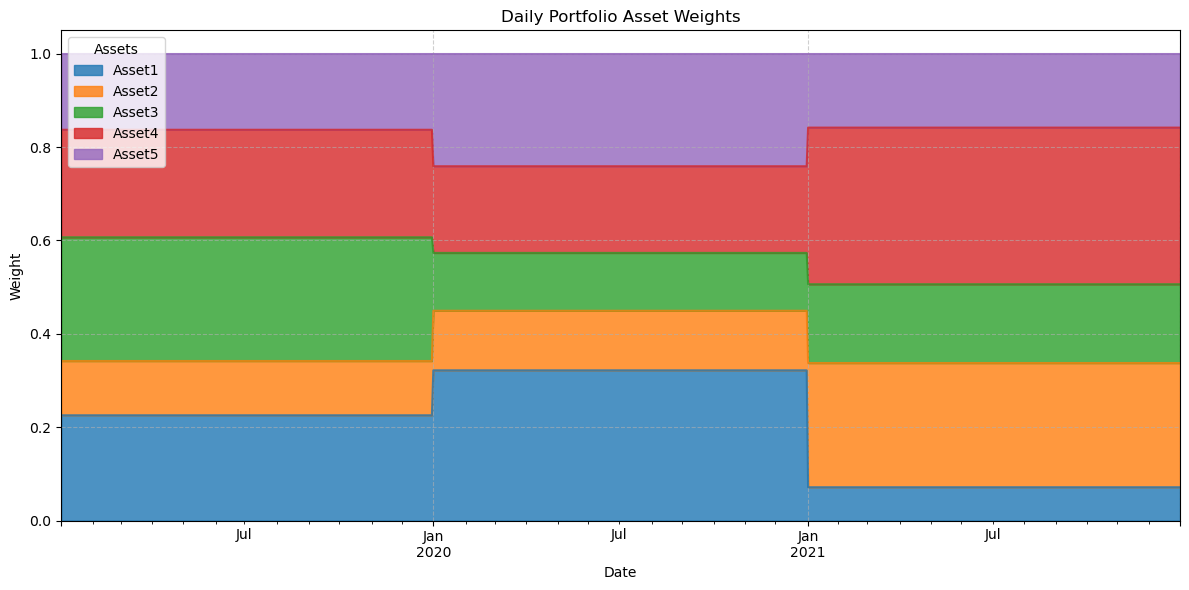

In [17]:
df3.plot.area(figsize=(12,6), alpha=0.8)
plt.title("Daily Portfolio Asset Weights")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.legend(title="Assets", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('asset_weights.png', bbox_inches='tight')
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [18]:
portfolio_returns = (df3.shift(1) * returns).sum(axis=1)
portfolio_returns = portfolio_returns.dropna()

In [19]:
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns

date
2019-01-02    0.000000
2019-01-03   -0.599748
2019-01-04   -0.143949
2019-01-07    0.029081
2019-01-08    0.279682
                ...   
2021-12-27   -0.999377
2021-12-28   -0.999218
2021-12-29   -0.999400
2021-12-30   -0.999304
2021-12-31   -0.999390
Length: 783, dtype: float64

In [20]:
print("Prices shape:", df2.shape)
print("Weights shape:", df3.shape)
print("Common dates:", len(df2.index.intersection(df3.index)))

print(df2.head())
print(df3.head())

Prices shape: (783, 5)
Weights shape: (783, 5)
Common dates: 783
              Asset1  Asset2     Asset3  Asset4  Asset5
date                                                   
2019-01-02  231.5061  55.875  25.649222  302.93   50.89
2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2019-01-04  230.4026  56.129  26.147133  301.77   51.38
2019-01-07  230.0543  56.838  25.955277  302.33   52.14
2019-01-08  229.7012  56.895  26.137997  303.42   52.13
              Asset1    Asset2    Asset3   Asset4    Asset5
date                                                       
2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974


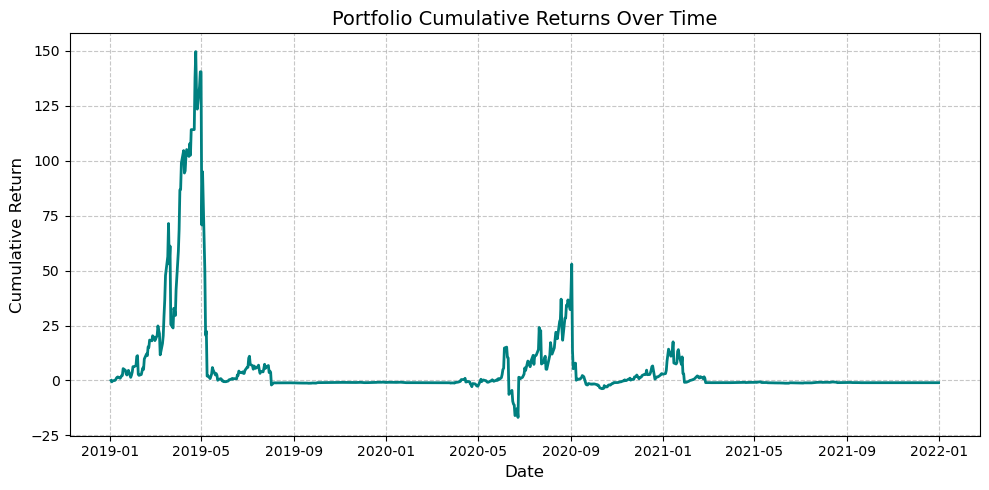

In [21]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_returns, color='teal', linewidth=2)
plt.title("Portfolio Cumulative Returns Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('portfolio_plot.png', bbox_inches='tight')
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [22]:
portfolio_returns = portfolio_returns / 100

In [23]:
print(portfolio_returns.head())
print(portfolio_returns.describe())

date
2019-01-02    0.000000
2019-01-03   -0.005997
2019-01-04    0.011388
2019-01-07    0.002021
2019-01-08    0.002435
dtype: float64
count    783.000000
mean       0.000431
std        0.005266
min       -0.040990
25%       -0.001322
50%        0.000532
75%        0.002881
max        0.029672
dtype: float64


In [24]:
annualized_return = (1 + portfolio_returns.mean()) ** 261 - 1
print(f"Annualized Return: {annualized_return:.2%}")

Annualized Return: 11.89%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [25]:
annualized_volatility = portfolio_returns.std() * np.sqrt(261)

print(f"Annualized Volatility: {annualized_volatility:.2%}")

Annualized Volatility: 8.51%


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

In [26]:
# Reset index to make 'date' a column
weights_melted = df3.reset_index().melt(
    id_vars='date', var_name='Name', value_name='Weight'
)


In [27]:
weights_with_family = weights_melted.merge(df1, on='Name', how='left')

In [28]:
category_weights = (
    weights_with_family.groupby(['date', 'Family'])['Weight']
    .sum()
    .unstack(fill_value=0)
)

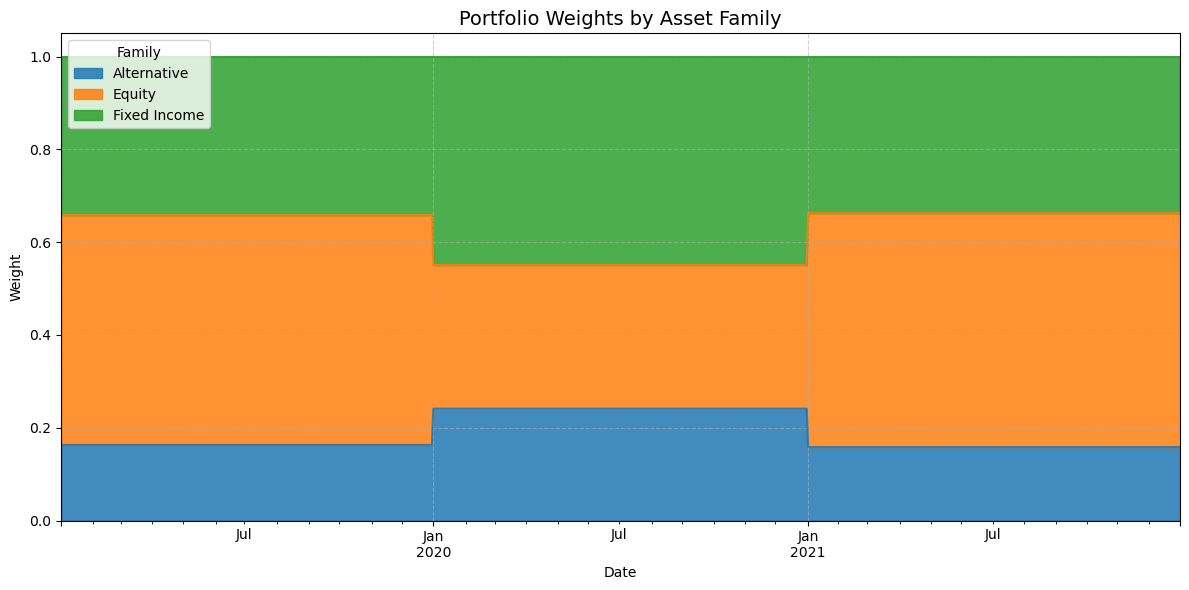

In [29]:
category_weights.plot.area(figsize=(12,6), alpha=0.85)
plt.title("Portfolio Weights by Asset Family", fontsize=14)
plt.ylabel("Weight")
plt.xlabel("Date")
plt.legend(title="Family", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('portfolio_weights_by_asset.png', bbox_inches='tight')
plt.show()
